In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
n_samples = 10_000

In [3]:
def transform_to_normal(x: np.ndarray, r_square: np.ndarray) -> np.ndarray:
    return x * np.sqrt(-2*np.log(r_square)/r_square)

def generate_relevant_pairs(n: int):
    x_min, x_max = -1, 1
    u1, u2 = np.random.uniform(x_min, x_max, n), np.random.uniform(x_min, x_max, n)
    mask = (u1**2 + u2**2) <= 1
    return u1[mask], u2[mask]

def box_muller_sampling(n: int) -> np.ndarray:
    u1, u2 = generate_relevant_pairs(n)
    r_square = u1**2 + u2**2
    z1, z2 = transform_to_normal(u1, r_square), transform_to_normal(u2, r_square)
    z = np.hstack([z1, z2])
    return z[:n]

In [4]:
z = box_muller_sampling(n_samples)

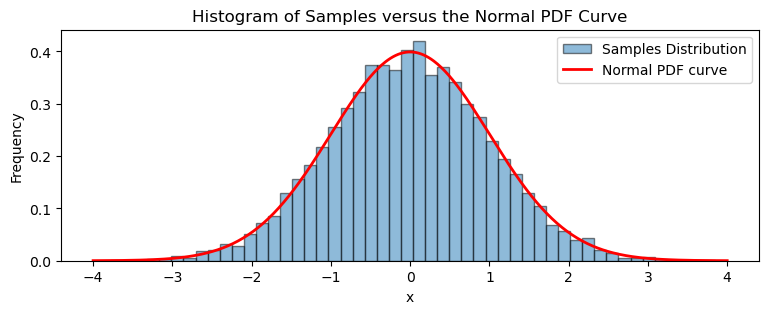

In [5]:
# Plot histogram 
plt.figure(figsize=(9, 3))
plt.hist(z, bins=50, density=True, alpha=0.5, label='Samples Distribution', edgecolor='black')


# Scale the PDF to match histogram scale
x_vals = np.linspace(-4, 4, 500)
pdf_vals = st.norm.pdf(x_vals)

# Plot the scaled PDF curve
plt.plot(x_vals, pdf_vals, 'r-', label='Normal PDF curve', linewidth=2)

plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Histogram of Samples versus the Normal PDF Curve')
plt.legend()
plt.show()